# 🚢 End-to-end Titanic Dataset Classification

## 1. Problem

> Titanic Passenger Data - Exploring Survival Patterns and Demographic Information

## 2. Data

the Data we're using is from kaggle's Titanic Dataset

https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset/data

## 3. Evaluation

The evaluation is a file with a dataset used for exploring patterns and factors associated with survival on the Titanic.

## 4. Features

here are some of the data :

**PassengerId**: Unique identifier for each passenger.

**Survived:** Survival status of the passenger (0 = Not Survived, 1 = Survived).

**Pclass:** Passenger class (1 = First class, 2 = Second class, 3 = Third class).

**Sex:** Gender of the passenger.

**Age:** Age of the passenger.

**SibSp:** Number of siblings/spouses aboard the Titanic.

**Parch:** Number of parents/children aboard the Titanic.

**Fare:** Fare paid by the passenger.

**Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).



## Importing our tools


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [61]:
df = pd.read_csv("drive/MyDrive/TITANIC_CLASSIFICATION/SVMtrain.csv")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [62]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,879,880,881,882,883,884,885,886,887,888
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Sex,Male,female,female,female,Male,Male,Male,Male,female,female,...,Male,female,Male,Male,female,Male,female,female,Male,Male
Age,22.0,38.0,26.0,35.0,35.0,60.0,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,60.0,26.0,32.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [66]:
for col in df.columns:
     if df[col].dtype == 'float':
         df[col] = df[col].astype('int')

print(df)


     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  Fare  Embarked
0              1         0       3    Male   22      1      0     7         3
1              2         1       1  female   38      1      0    71         1
2              3         1       3  female   26      0      0     7         3
3              4         1       1  female   35      1      0    53         3
4              5         0       3    Male   35      0      0     8         3
..           ...       ...     ...     ...  ...    ...    ...   ...       ...
884          887         0       2    Male   27      0      0    13         3
885          888         1       1  female   19      0      0    30         3
886          889         0       3  female   60      1      2    23         3
887          890         1       1    Male   26      0      0    30         1
888          891         0       3    Male   32      0      0     7         2

[889 rows x 9 columns]


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  889 non-null    int64 
 1   Survived     889 non-null    int64 
 2   Pclass       889 non-null    int64 
 3   Sex          889 non-null    object
 4   Age          889 non-null    int64 
 5   SibSp        889 non-null    int64 
 6   Parch        889 non-null    int64 
 7   Fare         889 non-null    int64 
 8   Embarked     889 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.6+ KB


## Data Preprocessing

In [68]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [69]:
df.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,879,880,881,882,883,884,885,886,887,888
PassengerId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,882.0,883.0,884.0,885.0,886.0,887.0,888.0,889.0,890.0,891.0
Survived,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Pclass,3.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,...,3.0,3.0,2.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0
Sex,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN
Age,22.0,38.0,26.0,35.0,35.0,60.0,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,60.0,26.0,32.0
SibSp,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Parch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0
Fare,7.0,71.0,7.0,53.0,8.0,8.0,51.0,21.0,11.0,30.0,...,7.0,10.0,10.0,7.0,29.0,13.0,30.0,23.0,30.0,7.0
Embarked,3.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0


In [70]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,577
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [71]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex            577
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [72]:
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

/tmp/ipython-input-2953594873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)


In [73]:
df.drop('PassengerId', axis=1, inplace=True)

## Split Data

<Axes: >

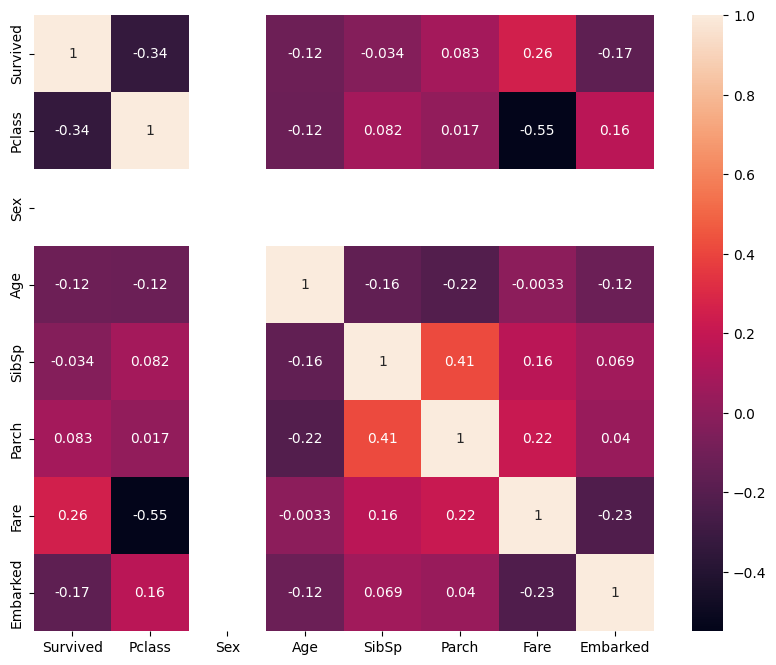

In [74]:
X = df.drop('Survived', axis=1)
y = df['Survived']

plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

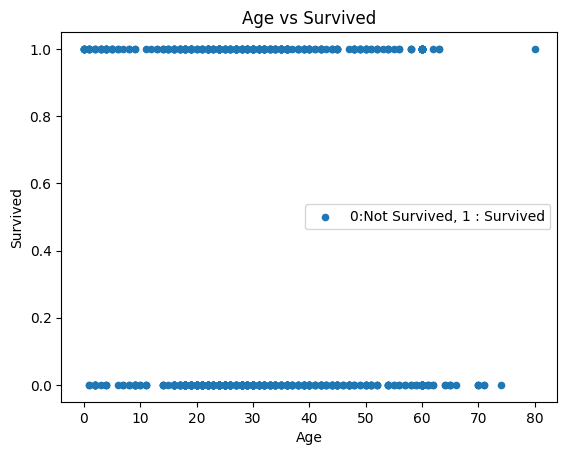

In [75]:
df.plot(kind='scatter', x='Age', y='Survived')

plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Age vs Survived")
plt.legend(["0:Not Survived, 1 : Survived"])


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,1.0,22,0,0,151,3
239,3,1.0,60,1,0,14,1
381,3,1.0,32,0,0,7,3
791,3,1.0,60,8,2,69,3
682,3,1.0,14,5,2,46,3
...,...,...,...,...,...,...,...
106,3,1.0,60,0,0,7,3
270,3,1.0,25,0,0,0,3
860,1,1.0,48,0,0,25,3
435,3,1.0,21,2,2,34,3


In [78]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((711, 7), (711,), (178, 7), (178,))

In [79]:
711 + 178

889

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    float64
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    int64  
 7   Embarked  889 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.7 KB


## Training our Model

In [81]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [82]:
# SGDClassifier

sgd_model = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, max_iter=1000, random_state=42)

# Train the model
sgd_model.fit(X_train, y_train)

# Evaluate the model
sgd_score = cross_val_score(sgd_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", sgd_score)
print("Accuracy:", sgd_score.mean())

Cross-validation scores: [0.67832168 0.58450704 0.73239437 0.66197183 0.61971831]
Accuracy: 0.6553826455234906


In [83]:
y_pred = sgd_model.predict(X_test)


In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Test Accuracy:{accuracy_score(y_test, y_pred) * 100:.2f}%")

Test Accuracy:70.79%


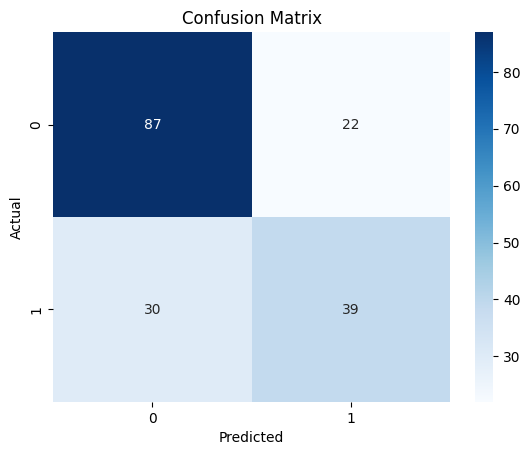

In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [86]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       109
           1       0.64      0.57      0.60        69

    accuracy                           0.71       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.70      0.71      0.70       178



In [87]:
# RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model

rf_model.score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation score:", rf_model.score)
print("Accuracy:", rf_model.score.mean())

Cross-validation score: [0.63636364 0.76760563 0.73239437 0.73943662 0.66197183]
Accuracy: 0.7075544174135724


In [88]:
y_pred = rf_model.predict(X_test)

In [89]:
# Accuracy for RF
print(f"Test Accuracy:{accuracy_score(y_test, y_pred) * 100:.2f}%")

Test Accuracy:67.98%


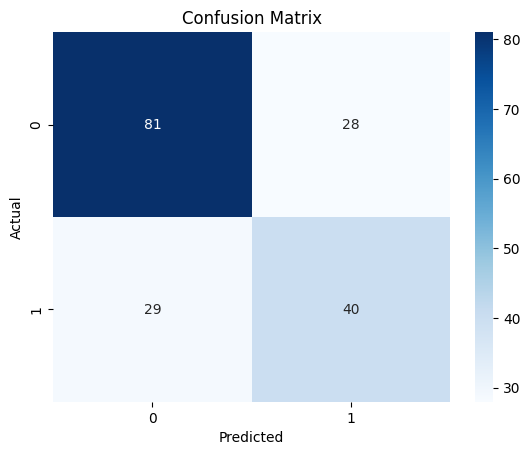

In [90]:
# Confusion Matric for RF

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
# Classification Report for RF
rf = classification_report(y_test, y_pred)
print(rf)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       109
           1       0.59      0.58      0.58        69

    accuracy                           0.68       178
   macro avg       0.66      0.66      0.66       178
weighted avg       0.68      0.68      0.68       178



In [92]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model

knn_model.score = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation score:", knn_model.score)
print("Accuracy:", knn_model.score.mean())

Cross-validation score: [0.65034965 0.66901408 0.75352113 0.67605634 0.62676056]
Accuracy: 0.6751403526051414


In [93]:
y_pred = knn_model.predict(X_test)

In [94]:
# Accuracy for KKN

print(f"Test Accuracy:{accuracy_score(y_test, y_pred) * 100:.2f}%")

Test Accuracy:69.10%


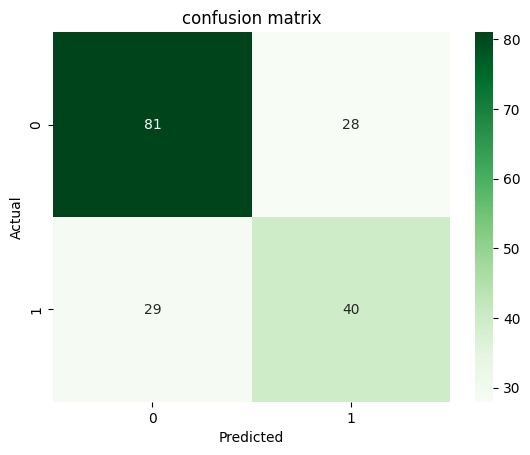

In [95]:
# Confusion matrix for KNN
sns.heatmap(cm, annot=True, fmt='d', cmap ='Greens')
plt.title("confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [96]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       109
           1       0.63      0.49      0.55        69

    accuracy                           0.69       178
   macro avg       0.67      0.65      0.66       178
weighted avg       0.68      0.69      0.68       178



## Feature Engineering our model

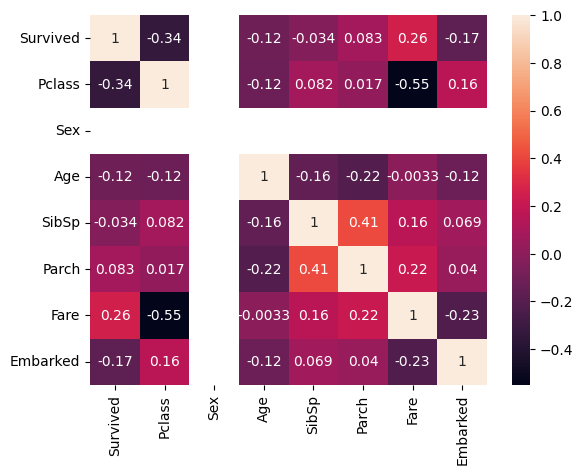

In [97]:
df.corr()['Survived'].sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [98]:
# Improving our model SGDClassifier using RandomizedCSV
from sklearn.model_selection import RandomizedSearchCV
sgd = SGDClassifier()

In [107]:
param_distributions = {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'loss': ['hinge', 'log_loss', 'modified_huber'],
        'max_iter': np.arange(1000, 5000, 500), # Integer range for max_iter
        'learning_rate': ['optimal', 'invscaling', 'adaptive'],
    }
rs = RandomizedSearchCV(estimator=sgd,
                        cv=5,
                        n_iter=100,
                        scoring="accuracy",
                        random_state=42,
                        n_jobs=-1,
                        param_distributions=param_distributions)

In [108]:
rs.fit(X_train,y_train)
rs.score(X_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
345 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
345 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 930, in fit
    self._mor

0.7078651685393258

In [109]:
rs.best_params_

{'penalty': 'l2',
 'max_iter': np.int64(4000),
 'loss': 'modified_huber',
 'learning_rate': 'optimal'}

In [110]:
# Adding a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=42))
])

param_distributions = {
        'sgd__penalty': ['l1', 'l2', 'elasticnet'],
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber'],
        'sgd__max_iter': np.arange(1000, 5000, 500), # Integer range for max_
        'sgd__learning_rate': ['optimal', 'invscaling', 'adaptive'],
    }
rs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)
rs.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
345 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
345 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, *

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sgd',
                                              SGDClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'sgd__learning_rate': ['optimal',
                                                               'invscaling',
                                                               'adaptive'],
                                        'sgd__loss': ['hinge', 'log_loss',
                                                      'modified_huber'],
                                        'sgd__max_iter': array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]),
                                        'sgd__penalty': ['l1', 'l2',
                                                         'elasticnet']},
                   random_state=42, scoring='accuracy')

In [111]:
rs.score(X_test, y_test)

0.5337078651685393

In [113]:
import joblib
joblib.dump(rs.best_estimator_, "model_sgd_v1.pkl")

['model_sgd_v1.pkl']